In [2]:
import pandas as pd
import numpy as np

In [3]:
yield_data_18=pd.read_csv('./Dataset_Potato_18_20/Yield2020.csv').drop(columns=['Unnamed: 0'])

In [4]:
yield_data_18

,sample,row,ID,bin,yield,DM,Tret,yieldDM,block,position,year
0,1,353,Aventra,1,33.629630,35.532822,high,11.949556,1,North,2020
1,2,353,Aventra,2,45.000000,33.883994,high,15.247797,1,North,2020
2,3,353,Aventra,3,48.133333,34.151085,high,16.438055,1,South,2020
3,4,353,Aventra,4,37.416667,33.398940,high,12.496770,1,South,2020
4,5,355,Mikado,1,44.055556,20.706692,high,9.122448,1,North,2020
...,...,...,...,...,...,...,...,...,...,...,...
187,188,445,Frig,4,35.166667,24.092827,low,8.472644,8,South,2020
188,189,447,Argana,1,35.481481,25.415140,low,9.017668,8,North,2020
189,190,447,Argana,2,50.833333,23.024000,low,11.703867,8,North,2020
190,191,447,Argana,3,52.013333,22.588303,low,11.748930,8,South,2020


In [5]:
idata=yield_data_18[['bin','row','ID','position','yield','yieldDM']].copy()


In [6]:
idata_wet_sample=idata[(idata['position']=='South')&(idata['bin']==3)| (idata['position']=='North')&(idata['bin']==2)]

In [7]:
idata_dry_sample=idata[(idata['position']=='South')&(idata['bin']==4)| (idata['position']=='North')&(idata['bin']==1)]

In [8]:
idata_dry_sample.reset_index(drop=True,inplace=True)

In [9]:
idata_dry_sample

,bin,row,ID,position,yield,yieldDM
0,1,353,Aventra,North,33.629630,11.949556
1,4,353,Aventra,South,37.416667,12.496770
2,1,355,Mikado,North,44.055556,9.122448
3,4,355,Mikado,South,37.666667,8.984736
4,1,357,Argana,North,34.058333,8.166339
...,...,...,...,...,...,...
91,4,443,Mikado,South,40.458333,9.318104
92,1,445,Frig,North,25.481481,5.844754
93,4,445,Frig,South,35.166667,8.472644
94,1,447,Argana,North,35.481481,9.017668


In [10]:
idata_wet_sample.reset_index(drop=True,inplace=True)

In [12]:
Dry_mean=idata_dry_sample[:96].groupby(idata_dry_sample.index[:96] // 2).mean().reset_index(drop=True).drop(['bin'],axis=1)

/tmp/ipykernel_10955/492338072.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Dry_mean=idata_dry_sample[:96].groupby(idata_dry_sample.index[:96] // 2).mean().reset_index(drop=True).drop(['bin'],axis=1)


In [13]:
Wet_mean=idata_wet_sample[:96].groupby(idata_wet_sample.index[:96] // 2).mean().reset_index(drop=True).drop(['bin'],axis=1)

/tmp/ipykernel_10955/1710875285.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Wet_mean=idata_wet_sample[:96].groupby(idata_wet_sample.index[:96] // 2).mean().reset_index(drop=True).drop(['bin'],axis=1)


In [14]:
Wet_mean.head(5)

,row,yield,yieldDM
0,353.0,46.566667,15.842926
1,355.0,43.683333,9.347396
2,357.0,36.652778,9.166284
3,359.0,38.633333,9.938486
4,361.0,37.000000,12.677156


In [18]:
Wet_mean

,row,yield,yieldDM
0,353.0,46.566667,15.842926
1,355.0,43.683333,9.347396
2,357.0,36.652778,9.166284
3,359.0,38.633333,9.938486
4,361.0,37.000000,12.677156
5,363.0,49.930556,10.950132
6,365.0,58.963889,14.382091
7,367.0,48.408333,16.029192
8,369.0,33.475000,7.850467
9,371.0,35.183333,12.324192


In [15]:
RL=pd.read_csv('SQRL_average_5_interval_2020.csv').drop(columns=['Unnamed: 0'])

In [16]:
RL

,"RL_June_SD_(38, 59]","RL_June_SD_(59, 81]","RL_June_SD_(81, 102]","RL_June_SD_(102, 124]","RL_June_SD_(124, 145]",row,"RL_Aug_SD_(38, 59]","RL_Aug_SD_(59, 81]","RL_Aug_SD_(81, 102]","RL_Aug_SD_(102, 124]","RL_Aug_SD_(124, 145]"
0,0.552602,0.172767,0.088841,0.0,0.0,353.0,0.404272,0.424225,0.400577,0.175984,0.068301
1,0.653503,0.390128,0.089470,0.0,0.0,355.0,0.423300,0.333247,0.247239,0.258150,0.116100
2,1.054816,0.139395,0.093689,0.0,0.0,357.0,0.534393,0.671749,0.470107,0.237599,0.054544
3,0.427003,0.324616,0.107129,0.0,0.0,359.0,0.402613,0.467834,0.371452,0.263581,0.232917
4,0.694108,0.212477,0.119016,0.0,0.0,361.0,0.730462,0.860777,0.671323,0.423497,0.192238
5,0.420634,0.139622,0.045886,0.0,0.0,363.0,0.268572,0.308602,0.116231,0.074481,0.056656
6,1.189592,0.413326,0.202626,0.0,0.0,365.0,0.090626,0.047792,0.030151,0.012298,0.000000
7,0.533547,0.090909,0.026644,0.0,0.0,367.0,0.369356,0.512072,0.363520,0.348754,0.148039
8,0.466654,0.170273,0.072151,0.0,0.0,369.0,0.513089,0.339411,0.510402,0.428891,0.195048
9,0.473909,0.274061,0.153717,0.0,0.0,371.0,0.678931,0.530974,0.853752,0.375345,0.323156


In [18]:
RL_yields_Dry=pd.merge(Dry_mean,RL,on='row')
RL_yields_Wet=pd.merge(Wet_mean,RL,on='row')

In [19]:
RL_yields_Wet

,row,yield,yieldDM,"RL_June_SD_(38, 59]","RL_June_SD_(59, 81]","RL_June_SD_(81, 102]","RL_June_SD_(102, 124]","RL_June_SD_(124, 145]","RL_Aug_SD_(38, 59]","RL_Aug_SD_(59, 81]","RL_Aug_SD_(81, 102]","RL_Aug_SD_(102, 124]","RL_Aug_SD_(124, 145]"
0,353.0,46.566667,15.842926,0.552602,0.172767,0.088841,0.0,0.0,0.404272,0.424225,0.400577,0.175984,0.068301
1,355.0,43.683333,9.347396,0.653503,0.390128,0.089470,0.0,0.0,0.423300,0.333247,0.247239,0.258150,0.116100
2,357.0,36.652778,9.166284,1.054816,0.139395,0.093689,0.0,0.0,0.534393,0.671749,0.470107,0.237599,0.054544
3,359.0,38.633333,9.938486,0.427003,0.324616,0.107129,0.0,0.0,0.402613,0.467834,0.371452,0.263581,0.232917
4,361.0,37.000000,12.677156,0.694108,0.212477,0.119016,0.0,0.0,0.730462,0.860777,0.671323,0.423497,0.192238
5,363.0,49.930556,10.950132,0.420634,0.139622,0.045886,0.0,0.0,0.268572,0.308602,0.116231,0.074481,0.056656
6,365.0,58.963889,14.382091,1.189592,0.413326,0.202626,0.0,0.0,0.090626,0.047792,0.030151,0.012298,0.000000
7,367.0,48.408333,16.029192,0.533547,0.090909,0.026644,0.0,0.0,0.369356,0.512072,0.363520,0.348754,0.148039
8,369.0,33.475000,7.850467,0.466654,0.170273,0.072151,0.0,0.0,0.513089,0.339411,0.510402,0.428891,0.195048
9,371.0,35.183333,12.324192,0.473909,0.274061,0.153717,0.0,0.0,0.678931,0.530974,0.853752,0.375345,0.323156


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
RL_table_main_Wet=RL_yields_Wet.drop(['row'], axis=1)
RL_table_main_Dry=RL_yields_Dry.drop(['row'], axis=1)





In [22]:
RL_table_main_Wet

,yield,yieldDM,"RL_June_SD_(38, 59]","RL_June_SD_(59, 81]","RL_June_SD_(81, 102]","RL_June_SD_(102, 124]","RL_June_SD_(124, 145]","RL_Aug_SD_(38, 59]","RL_Aug_SD_(59, 81]","RL_Aug_SD_(81, 102]","RL_Aug_SD_(102, 124]","RL_Aug_SD_(124, 145]"
0,46.566667,15.842926,0.552602,0.172767,0.088841,0.0,0.0,0.404272,0.424225,0.400577,0.175984,0.068301
1,43.683333,9.347396,0.653503,0.390128,0.089470,0.0,0.0,0.423300,0.333247,0.247239,0.258150,0.116100
2,36.652778,9.166284,1.054816,0.139395,0.093689,0.0,0.0,0.534393,0.671749,0.470107,0.237599,0.054544
3,38.633333,9.938486,0.427003,0.324616,0.107129,0.0,0.0,0.402613,0.467834,0.371452,0.263581,0.232917
4,37.000000,12.677156,0.694108,0.212477,0.119016,0.0,0.0,0.730462,0.860777,0.671323,0.423497,0.192238
5,49.930556,10.950132,0.420634,0.139622,0.045886,0.0,0.0,0.268572,0.308602,0.116231,0.074481,0.056656
6,58.963889,14.382091,1.189592,0.413326,0.202626,0.0,0.0,0.090626,0.047792,0.030151,0.012298,0.000000
7,48.408333,16.029192,0.533547,0.090909,0.026644,0.0,0.0,0.369356,0.512072,0.363520,0.348754,0.148039
8,33.475000,7.850467,0.466654,0.170273,0.072151,0.0,0.0,0.513089,0.339411,0.510402,0.428891,0.195048
9,35.183333,12.324192,0.473909,0.274061,0.153717,0.0,0.0,0.678931,0.530974,0.853752,0.375345,0.323156


In [23]:
RL_table_main_Wet['TRL']=RL_table_main_Wet.iloc[:,2:].sum(axis=1)
RL_table_main_Dry['TRL']=RL_table_main_Dry.iloc[:,2:].sum(axis=1)




In [24]:
RL_table_main_Dry

,yield,yieldDM,"RL_June_SD_(38, 59]","RL_June_SD_(59, 81]","RL_June_SD_(81, 102]","RL_June_SD_(102, 124]","RL_June_SD_(124, 145]","RL_Aug_SD_(38, 59]","RL_Aug_SD_(59, 81]","RL_Aug_SD_(81, 102]","RL_Aug_SD_(102, 124]","RL_Aug_SD_(124, 145]",TRL
0,35.523148,12.223163,0.552602,0.172767,0.088841,0.0,0.0,0.404272,0.424225,0.400577,0.175984,0.068301,2.287569
1,40.861111,9.053592,0.653503,0.390128,0.089470,0.0,0.0,0.423300,0.333247,0.247239,0.258150,0.116100,2.511137
2,35.987500,8.946565,1.054816,0.139395,0.093689,0.0,0.0,0.534393,0.671749,0.470107,0.237599,0.054544,3.256293
3,24.187500,6.785198,0.427003,0.324616,0.107129,0.0,0.0,0.402613,0.467834,0.371452,0.263581,0.232917,2.597146
4,33.445833,11.365176,0.694108,0.212477,0.119016,0.0,0.0,0.730462,0.860777,0.671323,0.423497,0.192238,3.903899
5,38.559524,8.539055,0.420634,0.139622,0.045886,0.0,0.0,0.268572,0.308602,0.116231,0.074481,0.056656,1.430684
6,39.505291,9.237055,1.189592,0.413326,0.202626,0.0,0.0,0.090626,0.047792,0.030151,0.012298,0.000000,1.986412
7,29.907407,9.323108,0.533547,0.090909,0.026644,0.0,0.0,0.369356,0.512072,0.363520,0.348754,0.148039,2.392840
8,26.907407,7.062810,0.466654,0.170273,0.072151,0.0,0.0,0.513089,0.339411,0.510402,0.428891,0.195048,2.695919
9,22.800926,7.701328,0.473909,0.274061,0.153717,0.0,0.0,0.678931,0.530974,0.853752,0.375345,0.323156,3.663845


In [25]:
RL_table_main_Wet['TRL_June']=RL_table_main_Wet.filter(regex='June').sum(axis=1)
RL_table_main_Wet['TRL_Aug']=RL_table_main_Wet.filter(regex='Aug').sum(axis=1)

RL_table_main_Dry['TRL_June']=RL_table_main_Dry.filter(regex='June').sum(axis=1)
RL_table_main_Dry['TRL_Aug']=RL_table_main_Dry.filter(regex='Aug').sum(axis=1)

In [27]:
RL_table_main_Dry=RL_table_main_Dry.replace(0,np.nan).dropna(axis=1,how="all")
RL_table_main_Wet=RL_table_main_Wet.replace(0,np.nan).dropna(axis=1,how="all")

In [29]:
RL_table_main_Dry

,yield,yieldDM,"RL_June_SD_(38, 59]","RL_June_SD_(59, 81]","RL_June_SD_(81, 102]","RL_Aug_SD_(38, 59]","RL_Aug_SD_(59, 81]","RL_Aug_SD_(81, 102]","RL_Aug_SD_(102, 124]","RL_Aug_SD_(124, 145]",TRL,TRL_June,TRL_Aug
0,35.523148,12.223163,0.552602,0.172767,0.088841,0.404272,0.424225,0.400577,0.175984,0.068301,2.287569,0.814210,1.473359
1,40.861111,9.053592,0.653503,0.390128,0.089470,0.423300,0.333247,0.247239,0.258150,0.116100,2.511137,1.133101,1.378036
2,35.987500,8.946565,1.054816,0.139395,0.093689,0.534393,0.671749,0.470107,0.237599,0.054544,3.256293,1.287900,1.968393
3,24.187500,6.785198,0.427003,0.324616,0.107129,0.402613,0.467834,0.371452,0.263581,0.232917,2.597146,0.858748,1.738398
4,33.445833,11.365176,0.694108,0.212477,0.119016,0.730462,0.860777,0.671323,0.423497,0.192238,3.903899,1.025602,2.878298
5,38.559524,8.539055,0.420634,0.139622,0.045886,0.268572,0.308602,0.116231,0.074481,0.056656,1.430684,0.606142,0.824542
6,39.505291,9.237055,1.189592,0.413326,0.202626,0.090626,0.047792,0.030151,0.012298,NaN,1.986412,1.805545,0.180867
7,29.907407,9.323108,0.533547,0.090909,0.026644,0.369356,0.512072,0.363520,0.348754,0.148039,2.392840,0.651100,1.741741
8,26.907407,7.062810,0.466654,0.170273,0.072151,0.513089,0.339411,0.510402,0.428891,0.195048,2.695919,0.709077,1.986842
9,22.800926,7.701328,0.473909,0.274061,0.153717,0.678931,0.530974,0.853752,0.375345,0.323156,3.663845,0.901687,2.762158


/tmp/ipykernel_10955/3105204044.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(RL_table_main_Wet.corr(), dtype=np.bool))


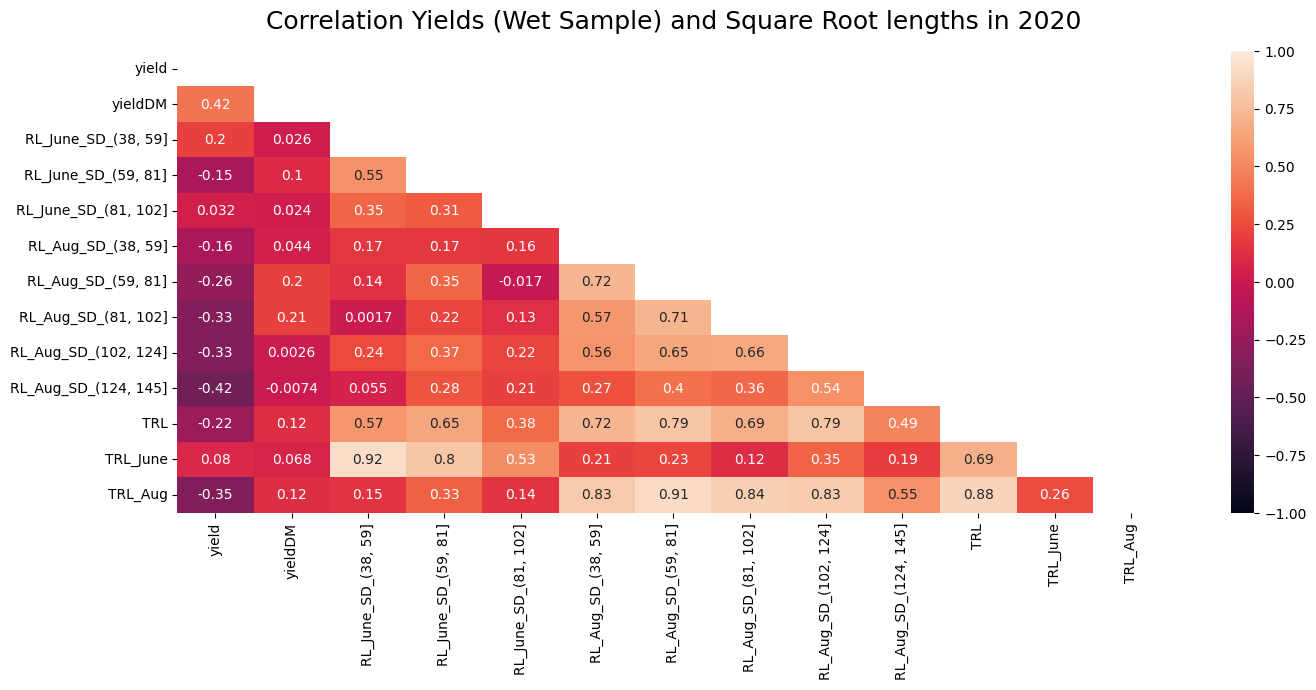

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(RL_table_main_Wet.corr(), dtype=np.bool))
heatmap = sns.heatmap(RL_table_main_Wet.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Yields (Wet Sample) and Square Root lengths in 2020', fontdict={'fontsize':18}, pad=16);
plt.savefig('Corr_RL_Wet_yields_2020.png')

/tmp/ipykernel_10955/3756981851.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(RL_table_main_Dry.corr(), dtype=np.bool))


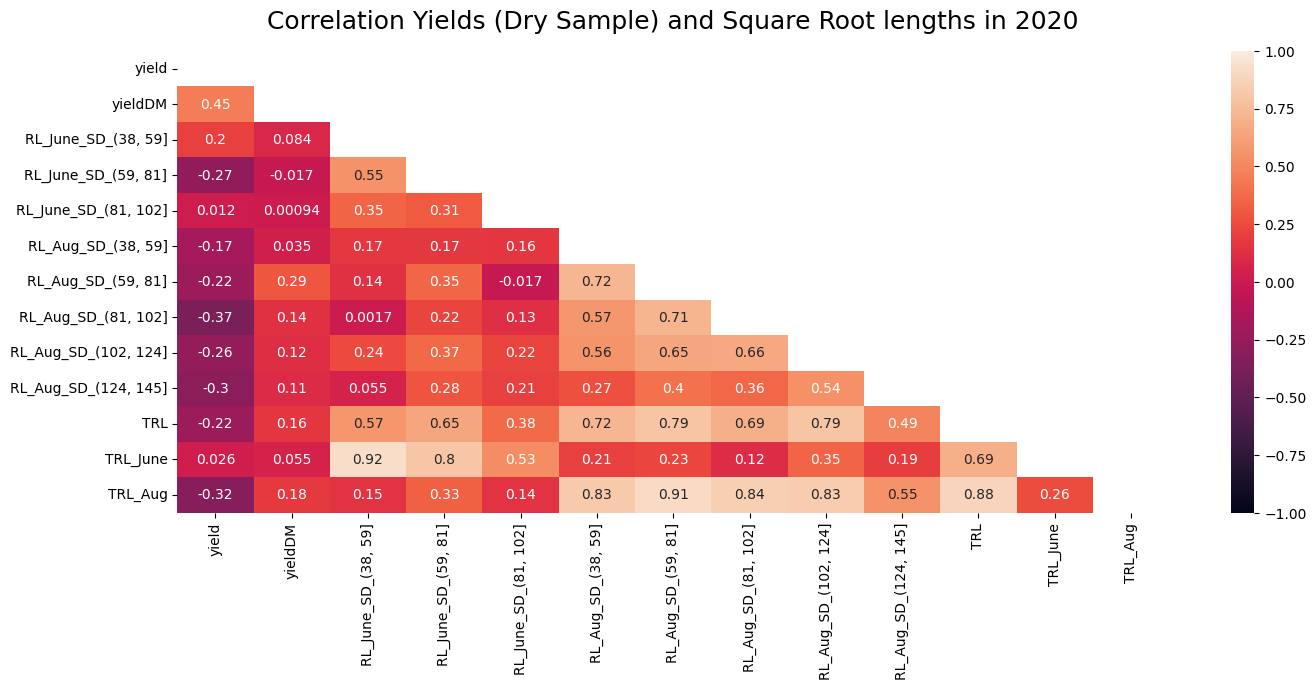

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(RL_table_main_Dry.corr(), dtype=np.bool))
heatmap = sns.heatmap(RL_table_main_Dry.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Yields (Dry Sample) and Square Root lengths in 2020', fontdict={'fontsize':18}, pad=16);
plt.savefig('Corr_RL_Dry_yields_2020.png')